<a href="https://colab.research.google.com/github/ebernardino01/DataAnalystPortfolio/blob/main/Jacksonville/Jacksonville_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jacksonville Property Prices Notebook

## Importing libraries

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor
)
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    explained_variance_score
)
%matplotlib inline

## Reading the data from source

In [26]:
# Set no limit on column display
pd.set_option('display.max_columns', None)

In [27]:
# Load csv file
# df = pd.read_csv(
#     'https://drive.google.com/uc?export=download&id=1J0FejBvcgn9w_VPjFTSm__q_uo5r3PS3'
# )

df = pd.concat(
    map(
        pd.read_csv, [
            'https://drive.google.com/uc?export=download&id=1J0FejBvcgn9w_VPjFTSm__q_uo5r3PS3',
            'https://drive.google.com/uc?export=download&id=1mNt85tN--a23wFJkwuUF4tsnV3m70Rht'
        ]
    ),
    ignore_index=True
)

print(df.shape)
df.info()

(5155, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5155 entries, 0 to 5154
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5155 non-null   int64  
 1   data_id            5155 non-null   int64  
 2   url                5155 non-null   object 
 3   media_img          5155 non-null   object 
 4   status             5155 non-null   object 
 5   price              5155 non-null   object 
 6   beds               4727 non-null   object 
 7   baths              4712 non-null   object 
 8   sqft               5155 non-null   float64
 9   sqftlot            5155 non-null   float64
 10  address            5155 non-null   object 
 11  city               5155 non-null   object 
 12  state              5155 non-null   object 
 13  zip_code           5155 non-null   int64  
 14  scraped_date_time  5155 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 604.2+ KB


## Cleaning and transforming the raw dataset

In [28]:
# Replace the null values in the columns
df['beds'].fillna(0, inplace=True)
df['baths'].fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5155 entries, 0 to 5154
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5155 non-null   int64  
 1   data_id            5155 non-null   int64  
 2   url                5155 non-null   object 
 3   media_img          5155 non-null   object 
 4   status             5155 non-null   object 
 5   price              5155 non-null   object 
 6   beds               5155 non-null   object 
 7   baths              5155 non-null   object 
 8   sqft               5155 non-null   float64
 9   sqftlot            5155 non-null   float64
 10  address            5155 non-null   object 
 11  city               5155 non-null   object 
 12  state              5155 non-null   object 
 13  zip_code           5155 non-null   int64  
 14  scraped_date_time  5155 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 604.2+ KB


In [29]:
# Remove the '$' in the price column
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['price']

0       134900.0
1       299900.0
2       118000.0
3       339900.0
4       250990.0
          ...   
5150    295000.0
5151    125000.0
5152    248599.0
5153    410000.0
5154    505000.0
Name: price, Length: 5155, dtype: float64

In [30]:
# Replace 'Studio' in the beds column
df['beds'] = df['beds'].replace('Studio', 0).astype(float)
df['beds'].unique()

array([ 4.,  0.,  2.,  3.,  5.,  6., 31.,  1.,  7.,  8., 13., 12.,  9.,
       10., 21.])

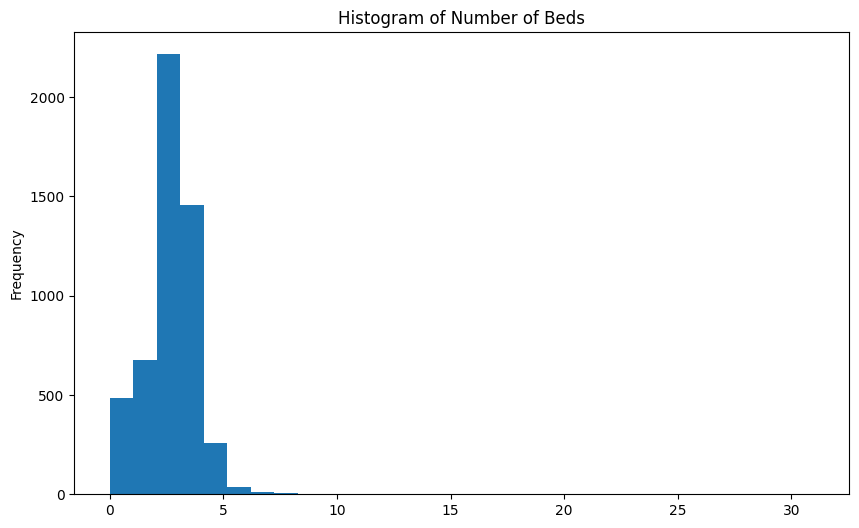

In [31]:
# Visualize values distribution
fig, ax = plt.subplots(figsize=(10, 6))
ax = df['beds'].plot(kind='hist', bins=30)
ax.set_title('Histogram of Number of Beds')
plt.show()

In [32]:
# Filter number of bedrooms outside of three sigma
min_range = df['beds'].mean() - \
    (3 * df['beds'].std())
max_range = df['beds'].mean() + \
    (3 * df['beds'].std())
print(min_range, max_range)
df = df[
    (df['beds'] >= min_range) &
    (df['beds'] <= max_range)
]
df['beds'].describe()

-1.1906867669875232 7.26983322673534


count    5139.000000
mean        3.009340
std         1.231919
min         0.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         7.000000
Name: beds, dtype: float64

In [33]:
# Remove the '+' sign in the baths column
df['baths'] = df['baths'].replace('[\+]', '', regex=True).astype(float)
df['baths'].unique()

<ipython-input-33-3249425e63e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['baths'] = df['baths'].replace('[\+]', '', regex=True).astype(float)


array([3. , 0. , 1. , 2. , 2.5, 3.5, 4. , 5.5, 1.5, 4.5, 5. , 6.5, 7.5,
       6. , 0.5, 7. ])

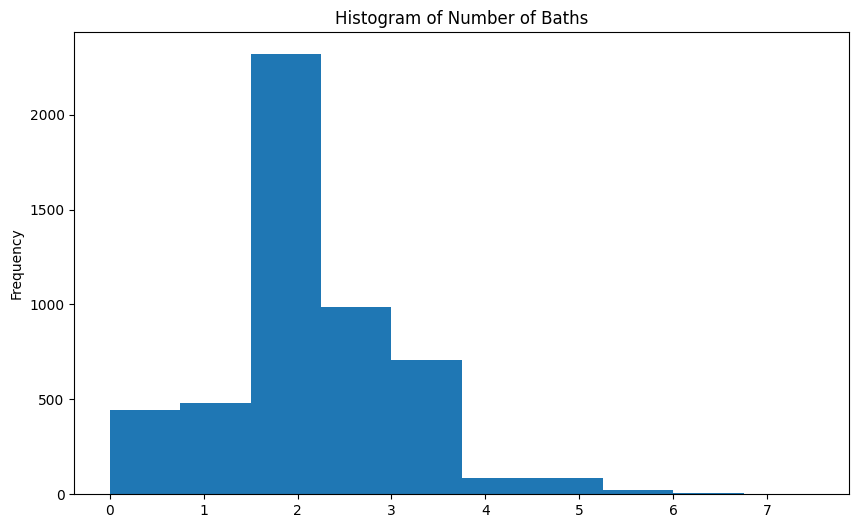

In [34]:
# Visualize values distribution
fig, ax = plt.subplots(figsize=(10, 6))
ax = df['baths'].plot(kind='hist', bins=10)
ax.set_title('Histogram of Number of Baths')
plt.show()

In [35]:
# Filter number of bathrooms outside of three sigma
min_range = df['baths'].mean() - \
    (3 * df['baths'].std())
max_range = df['baths'].mean() + \
    (3 * df['baths'].std())
print(min_range, max_range)
df = df[
    (df['baths'] >= min_range) &
    (df['baths'] <= max_range)
]
df['baths'].describe()

-0.8231827753726608 4.975352458190329


count    5092.000000
mean        2.044482
std         0.911221
min         0.000000
25%         2.000000
50%         2.000000
75%         2.500000
max         4.500000
Name: baths, dtype: float64

In [36]:
# Filter property area values outside of three sigma
min_range = df['sqft'].mean() - \
    (3 * df['sqft'].std())
max_range = df['sqft'].mean() + \
    (3 * df['sqft'].std())
print(min_range, max_range)
df = df[
    (df['sqft'] >= min_range) &
    (df['sqft'] <= max_range)
]
df['sqft'].describe()

-937.507902034082 4228.46587532552


count    5052.000000
mean     1619.939430
std       813.363125
min         0.000000
25%      1188.000000
50%      1601.000000
75%      2089.250000
max      4226.000000
Name: sqft, dtype: float64

In [37]:
# Filter lot area values outside of three sigma
min_range = df['sqftlot'].mean() - \
    (3 * df['sqftlot'].std())
max_range = df['sqftlot'].mean() + \
    (3 * df['sqftlot'].std())
print(min_range, max_range)
df = df[
    (df['sqftlot'] >= min_range) &
    (df['sqftlot'] <= max_range)
]
df['sqftlot'].describe()

-20399975.10731258 20680481.542387795


count    5.048000e+03
mean     1.510347e+04
std      1.479537e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.969600e+06
Name: sqftlot, dtype: float64

In [38]:
# Check for duplicates
df[df.duplicated()]

,id,data_id,url,media_img,status,price,beds,baths,sqft,sqftlot,address,city,state,zip_code,scraped_date_time


In [39]:
# Dataset after cleaning
df = df[['price', 'beds', 'baths', 'sqft', 'sqftlot', 'zip_code']]
df.shape

(5048, 6)

## Determine the feature variables and target variable

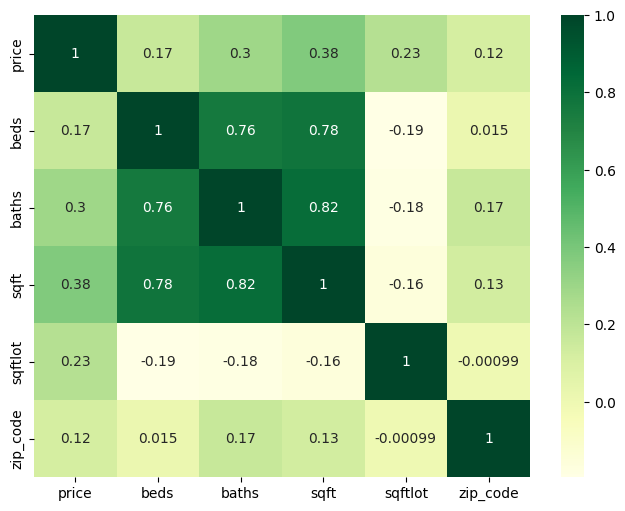

In [40]:
# Visualize heatmap of feature correlation
plt.figure(figsize=(8, 6))
sns.heatmap(
    df[df.columns.to_list()].corr(numeric_only = True),
    cmap='YlGn',
    annot=True
)
plt.show()

In [41]:
# Select features and target variable
features = df[['beds', 'baths', 'sqft', 'sqftlot', 'zip_code']]
target = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=0
)

## Use sklearn's regression algorithms in predicting property prices

### Apply linear regression

In [42]:
# Train the model on the training data
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test data
lr_pred = lr_model.predict(X_test)

# Get the evaluation metrics
# 1. Calculate the mean absolute error of the model
lr_mae = mean_absolute_error(y_test, lr_pred)
print(f"Mean Absolute Error: {lr_mae:.2f}")

# 2. Calculate the coefficient of determination of the model
lr_r2_score = r2_score(y_test, lr_pred)
print(f"R^2 Score: {lr_r2_score:.2f}")

# 3. Calculate model score
lr_score = lr_model.score(X_test, y_test)
print(f"Model score: {lr_score:.2f}")

# 4. Calculate explained variance score
lr_explain = explained_variance_score(lr_pred, y_test)
print(f"Explained variance score: {lr_explain:.2f}")

Mean Absolute Error: 127820.38
R^2 Score: 0.15
Model score: 0.15
Explained variance score: -1.93


### Apply decision tree regression

In [43]:
# Train the model on the training data
dt_model = DecisionTreeRegressor(random_state=0)
dt_model.fit(X_train, y_train)

# Make predictions on the test data
dt_pred = dt_model.predict(X_test)

# Get the evaluation metrics
# 1. Calculate the mean absolute error of the model
dt_mae = mean_absolute_error(y_test, dt_pred)
print(f"Mean Absolute Error: {dt_mae:.2f}")

# 2. Calculate the coefficient of determination of the model
dt_r2_score = r2_score(y_test, dt_pred)
print(f"R^2 Score: {dt_r2_score:.2f}")

# 3. Calculate model score
dt_score = dt_model.score(X_test, y_test)
print(f"Model score: {dt_score:.2f}")

# 4. Calculate explained variance score
dt_explain = explained_variance_score(dt_pred, y_test)
print(f"Explained variance score: {dt_explain:.2f}")

Mean Absolute Error: 102797.62
R^2 Score: -0.10
Model score: -0.10
Explained variance score: -0.56


### Apply random forest regression

In [44]:
# Train the model on the training data
rf_model = RandomForestRegressor(n_estimators=50, random_state=0)
rf_model.fit(X_train, y_train)

# Make predictions on the test data
rf_pred = rf_model.predict(X_test)

# Get the evaluation metrics
# 1. Calculate the mean absolute error of the model
rf_mae = mean_absolute_error(y_test, rf_pred)
print(f"Mean Absolute Error: {rf_mae:.2f}")

# 2. Calculate the coefficient of determination of the model
rf_r2_score = r2_score(y_test, rf_pred)
print(f"R^2 Score: {rf_r2_score:.2f}")

# 3. Calculate model score
rf_score = rf_model.score(X_test, y_test)
print(f"Model score: {rf_score:.2f}")

# 4. Calculate explained variance score
rf_explain = explained_variance_score(rf_pred, y_test)
print(f"Explained variance score: {rf_explain:.2f}")

Mean Absolute Error: 86022.63
R^2 Score: 0.43
Model score: 0.43
Explained variance score: -0.27


### Apply gradient boosting regression

In [45]:
# Train the model on the training data
gb_model = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, random_state=0)
gb_model.fit(X_train, y_train)

# Make predictions on the test data
gb_pred = gb_model.predict(X_test)

# Get the evaluation metrics
# 1. Calculate the mean absolute error of the model
gb_mae = mean_absolute_error(y_test, gb_pred)
print(f"Mean Absolute Error: {gb_mae:.2f}")

# 2. Calculate the coefficient of determination of the model
gb_r2_score = r2_score(y_test, gb_pred)
print(f"R^2 Score: {gb_r2_score:.2f}")

# 3. Calculate model score
gb_score = gb_model.score(X_test, y_test)
print(f"Model score: {gb_score:.2f}")

# 4. Calculate explained variance score
gb_explain = explained_variance_score(gb_pred, y_test)
print(f"Explained variance score: {gb_explain:.2f}")

Mean Absolute Error: 100366.10
R^2 Score: 0.51
Model score: 0.51
Explained variance score: -0.67
